In [1]:
### Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
### Importing the training set
name = 'RELIANCE'

dataset = pd.read_csv('./Preprocess_Data/'+str(name) +'.csv')
dataset = dataset.iloc[::-1,:]
training_set = dataset.iloc[:len(dataset)-15, 2:3].values



In [3]:
###Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [4]:
###Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(30, len(training_set) ):
    X_train.append(training_set_scaled[i-30:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [5]:
###Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [6]:
############################Building and Training the RNN############################
###Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [7]:
###Initialising the RNN
regressor = Sequential()

In [8]:
###Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
#regressor.add(Dropout(0.2))

In [9]:
###Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
#regressor.add(Dropout(0.2))

In [10]:
###Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
#regressor.add(Dropout(0.2))

In [11]:
### Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [12]:
###Adding the output layer
regressor.add(Dense(units = 1))

In [13]:
###Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [14]:
###Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
54/54 [==============================] - 6s 119ms/step - loss: 0.5034
Epoch 2/100
54/54 [==============================] - 0s 6ms/step - loss: 0.3384
Epoch 3/100
54/54 [==============================] - 0s 6ms/step - loss: 0.1284
Epoch 4/100
54/54 [==============================] - 0s 6ms/step - loss: 0.0571
Epoch 5/100
54/54 [==============================] - 0s 6ms/step - loss: 0.0904
Epoch 6/100
54/54 [==============================] - 0s 6ms/step - loss: 0.0228
Epoch 7/100
54/54 [==============================] - 0s 6ms/step - loss: 0.0293
Epoch 8/100
54/54 [==============================] - 0s 6ms/step - loss: 0.0387
Epoch 9/100
54/54 [==============================] - 0s 6ms/step - loss: 0.0395
Epoch 10/100
54/54 [==============================] - 0s 6ms/step - loss: 0.0249
Epoch 11/100
54/54 [==============================] - 0s 7ms/step - loss: 0.0148
Epoch 12/100
54/54 [==============================] - 0s 7ms/step - loss: 0.0264
Epoch 13/100
54/54 [===============

In [15]:
############### Making the predictions and visualising the results ###############
###Getting the real stock price
dataset_test = dataset.iloc[len(dataset)-15:, :]
real_stock_price = dataset.iloc[len(dataset)-15:, 2:3].values

In [16]:
###Getting the predicted stock price
dataset_total = pd.concat((dataset['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 30:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
#real_stock_price = sc.transform(real_stock_price)
X_test = []
for i in range(30, 30+len(real_stock_price)):
    X_test.append(inputs[i-30:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

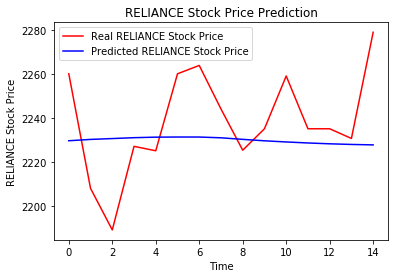

In [17]:
###Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real '+ name+' Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted '+ name+' Stock Price')
plt.title(name+' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(name+' Stock Price')
plt.legend()
plt.show()

In [18]:
### Implement mean absolute error
from sklearn.metrics import mean_absolute_error
print('mean abs error', mean_absolute_error(real_stock_price,predicted_stock_price))


mean abs error 19.097076822916673
